In [31]:
from sklearn.manifold import MDS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# getting the data, which is Project3_DistancesMatrix.xlsx
distances = pd.read_excel('Project3_DistancesMatrix.xlsx', index_col=0)

# let's create a numpy array from the dataframe
distances_matrix = distances.iloc[:].to_numpy()

Is the matrix symmetric? False
776 out of  10000 elements are not symmetric


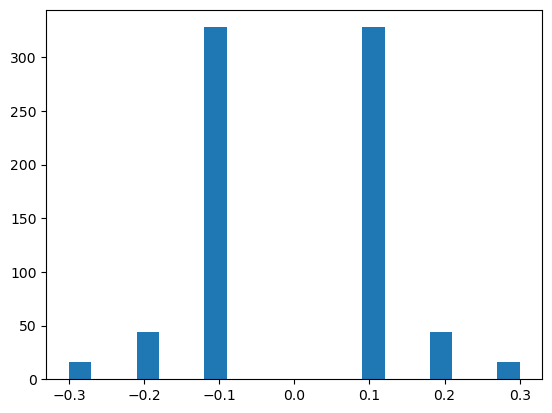

In [32]:
# let's check if the distances matrix is symmetric
print('Is the matrix symmetric?',np.allclose(distances_matrix, distances_matrix.T))
# let's see where it fails
non_symmetric = []
for i in range(len(distances_matrix)):
    for j in range(len(distances_matrix)):
        # instead of !=, let's use np.allclose
        if not np.allclose(distances_matrix[i,j], distances_matrix[j,i]):
            non_symmetric.append((i,j))

print(len(non_symmetric),'out of ',len(distances_matrix)**2,'elements are not symmetric')

# now that we have the non-symmetric indices, let's see how much they differ, with a histogram
differences = []
for i,j in non_symmetric:
    differences.append(distances_matrix[i,j] - distances_matrix[j,i])

plt.hist(differences, bins=20)
plt.show()


# let's correct the symmetry of the matrix
# by taking an average of the two values
symmetric_matrix = distances_matrix.copy()
for i,j in non_symmetric:
    symmetric_matrix[i,j] = symmetric_matrix[j,i] = (distances_matrix[i,j] + distances_matrix[j,i])/2

# let's try a second way of correcting the symmetry of the matrix
# by taking only the upper triangle matrix

In [16]:
# some of the best paths found by the algorithm

#0.05 mut, 3 tour, 0.8 cross
#fitness: (64.99999999999999,)
best_1 = [63, 81, 57, 53, 39, 30, 55, 87, 31, 82, 92, 85, 93, 94, 4, 27, 76, 75, 25, 9, 14, 60, 48, 18, 10, 45, 0, 44, 56, 8, 72, 74, 61, 79, 15, 35, 69, 7, 23, 73, 3, 51, 95, 22, 1, 70, 12, 49, 90, 41, 37, 36, 34, 21, 50, 38, 98, 96, 77, 91, 52, 86, 11, 29, 59, 16, 6, 89, 83, 5, 71, 26, 78, 54, 20, 80, 43, 84, 68, 32, 17, 33, 88, 42, 64, 28, 46, 47, 97, 24, 67, 2, 66, 58, 13, 40, 62, 19, 65]

#0.01 mut, 3 tour, 0.8 cross
#fitness: (43.90000000000001,)
best_2 = [5, 2, 47, 46, 10, 60, 45, 6, 89, 88, 33, 42, 16, 11, 86, 29, 59, 0, 44, 56, 57, 8, 53, 72, 52, 74, 39, 94, 93, 85, 82, 92, 4, 37, 36, 41, 34, 70, 12, 55, 77, 96, 49, 7, 30, 35, 15, 51, 95, 73, 3, 87, 31, 50, 21, 38, 98, 90, 69, 23, 79, 20, 91, 61, 81, 63, 17, 80, 1, 22, 54, 32, 84, 43, 68, 27, 78, 76, 26, 75, 71, 83, 25, 14, 48, 28, 9, 64, 18, 97, 67, 24, 66, 58, 62, 40, 13, 65, 19]

#0.05 mut, 5 tour, 0.8 cross
#fitness: (53.72)
best_3 = [75, 95, 51, 22, 68, 84, 73, 12, 70, 69, 7, 23, 30, 90, 35, 49, 98, 50, 21, 31, 87, 38, 3, 96, 77, 55, 15, 1, 80, 81, 11, 29, 86, 74, 37, 41, 36, 34, 17, 63, 42, 33, 88, 89, 25, 46, 9, 60, 48, 18, 10, 45, 6, 16, 0, 59, 44, 56, 57, 53, 8, 52, 61, 91, 39, 4, 82, 92, 85, 93, 94, 72, 79, 20, 54, 27, 76, 26, 78, 32, 43, 71, 83, 62, 65, 19, 40, 13, 58, 66, 2, 67, 97, 24, 47, 64, 28, 14, 5]


### best 4h
# with fitness: (40.800000000000004,)
best = [27, 32, 68, 84, 43, 80, 61, 91, 79, 20, 54, 22, 51, 95, 73, 3, 96, 98, 50, 38, 87, 31, 21, 55, 77, 70, 12, 49, 7, 35, 90, 30, 23, 69, 15, 1, 34, 36, 37, 41, 94, 93, 85, 82, 92, 4, 39, 74, 52, 72, 53, 8, 86, 57, 56, 44, 11, 59, 29, 0, 16, 6, 45, 25, 18, 10, 46, 14, 28, 64, 60, 9, 48, 47, 2, 67, 97, 24, 5, 40, 19, 62, 13, 58, 66, 83, 89, 88, 33, 42, 81, 78, 26, 76, 17, 63, 75, 71, 65]


In [34]:
def plot_paths(dists, paths, colors, alphas, seed=5, show_map=False):
    # we do need to fix a seed, so that the results are reproducible

    # with the help of sklearn, we can get approximate coordinates of the points
    mds = MDS(dissimilarity='precomputed',random_state=seed) # seeds: 20205, 5 
    coords = mds.fit_transform(dists)

    if show_map:
        # to plot the recycling bins
        plt.figure(figsize=(10,10))
        plt.scatter(coords[:, 0], coords[:, 1])

        for i in range(coords.shape[0]):
            plt.text(coords[i, 0], coords[i, 1], str(i))  # show index of point
        plt.title('Approximate map of the recycling bins')
        plt.axis('off')
        plt.show()


    plt.figure(figsize=(10,10))

    # scatter plot of the points
    plt.scatter(coords[:, 0], coords[:, 1])

    # emphasize the starting point
    plt.scatter(coords[0, 0], coords[0, 1], color='green', s=200, label='Start & End')  # s is the size of the point

    for i in range(coords.shape[0]):
        plt.text(coords[i, 0], coords[i, 1], str(i))  # show index of point

    # Draw the path with arrows indicating direction
    for p in range(len(paths)):
        path = paths[p]
        color = colors[p]
        alpha = alphas[p]
        for i in range(1, len(path)):
            # get start and end point for each step in the path
            start_coord = coords[path[i-1]]
            end_coord = coords[path[i]]

            # compute direction vector for the arrow
            direction = end_coord - start_coord

            # add the arrow to the plot
            plt.quiver(start_coord[0], start_coord[1], direction[0], direction[1], angles='xy', scale_units='xy', scale=1, color=color, alpha=alpha, width=0.003)
    
    plt.legend()
    plt.title('Best path found')
    plt.axis('off')
    plt.show()

/home/caria/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


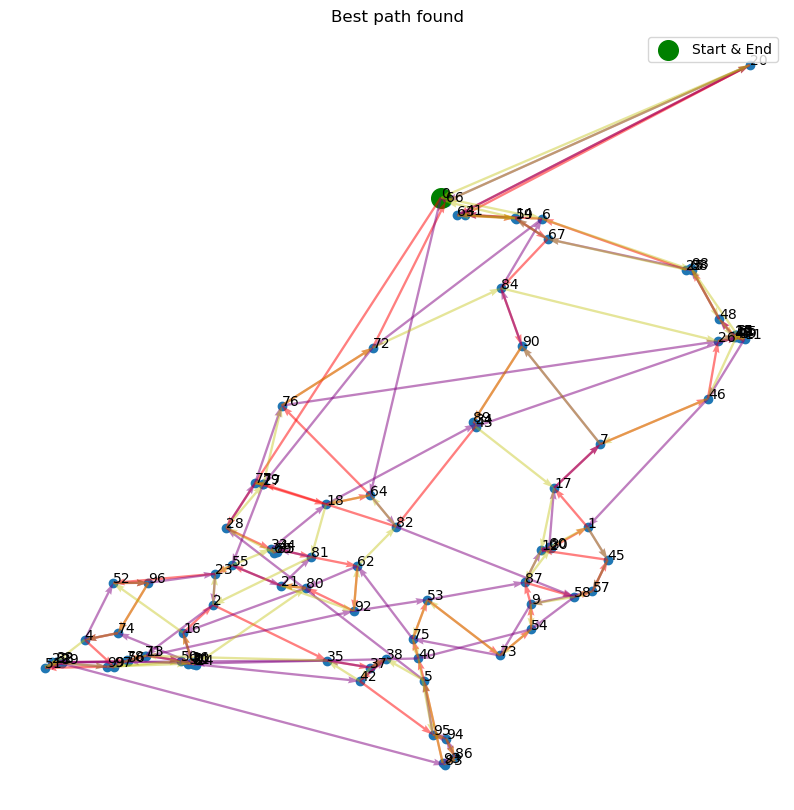

/home/caria/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


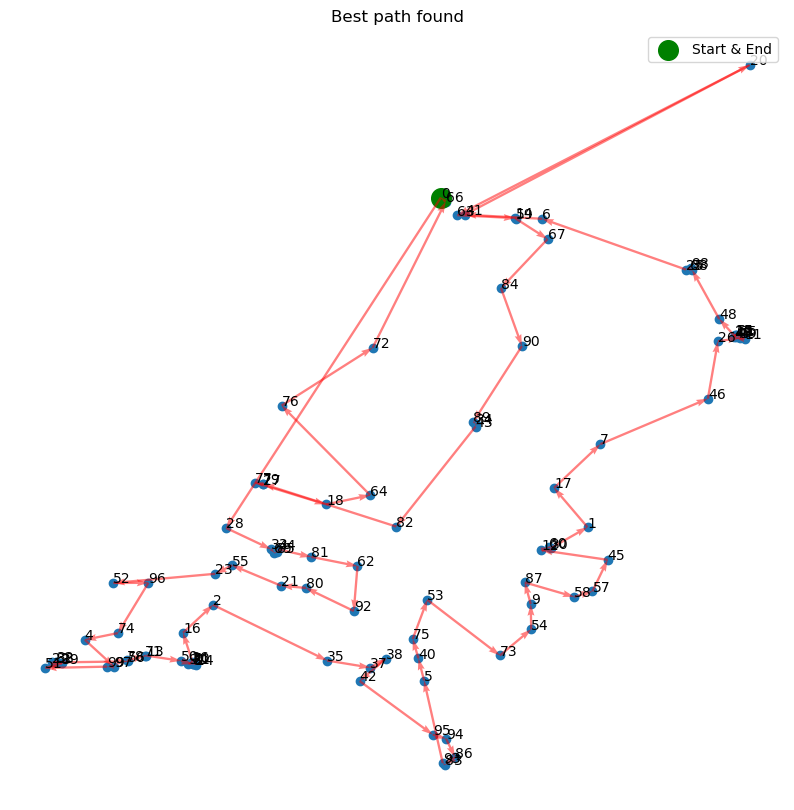

/home/caria/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


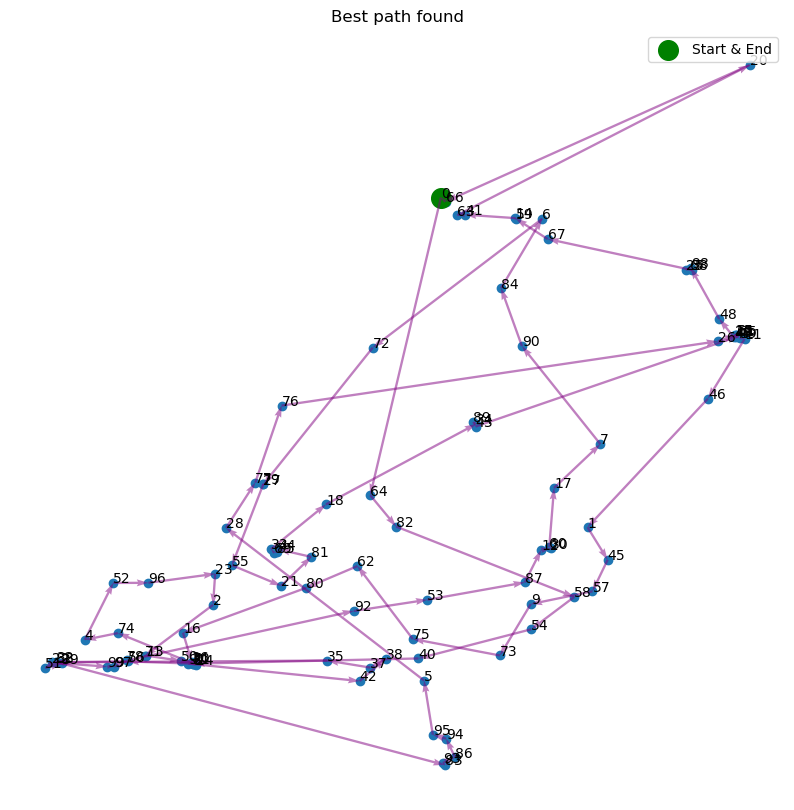

/home/caria/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


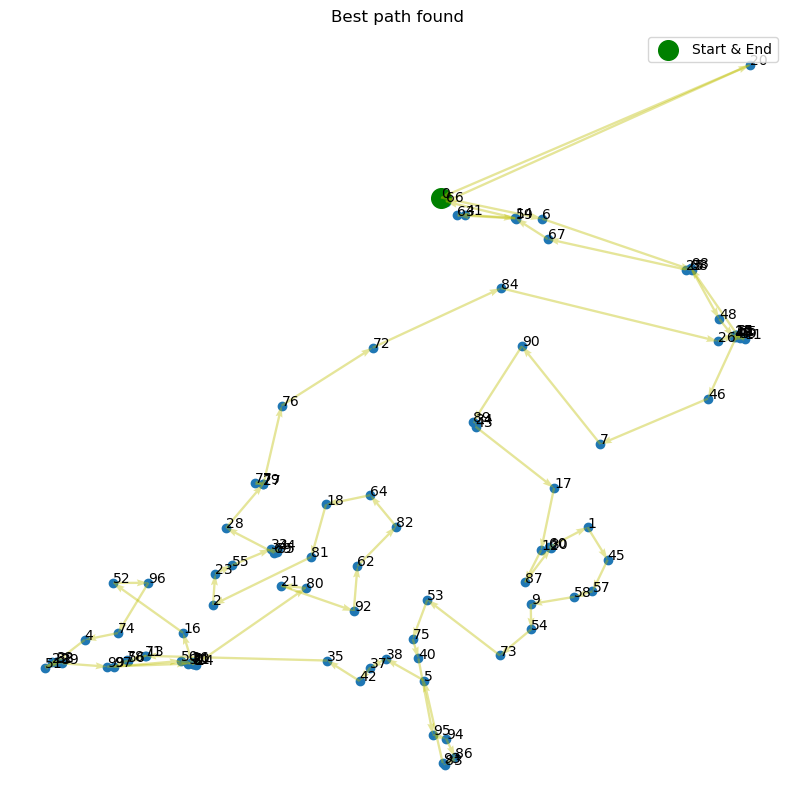

In [39]:
# testing the graphing function
dists = symmetric_matrix
paths = [best ,best_1, best_2, best_3]
# let's add 1 to each path, so that the starting point is 1
paths = [[-1] + path + [-1] for path in paths]
# each path will have all its entries be added by 1
paths = [[i+1 for i in path] for path in paths]
colors = ['r','purple', 'y', 'g']
alphas = [0.5, 0.5, 0.4, 0.3]
# how many we want to see now
n = 4
plot_paths(dists, paths[:n-1], colors[:n-1], alphas[:n-1])

# individual plot of each path
# which
for k in range(n-1):
    plot_paths(dists, [paths[k]], [colors[k]], [alphas[k]])


In [50]:
# is dists symmetric?
print('Is the matrix symmetric?',np.allclose(dists, dists.T))

Is the matrix symmetric? True


In [11]:


# assuming dists is your distance matrix
mds = MDS(dissimilarity='precomputed')
coords = mds.fit_transform(distances)

# coords now holds the coordinates of your houses in a 2D space


/home/caria/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


ValueError: Array must be symmetric

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(coords[:, 0], coords[:, 1])
plt.show()
